In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040013.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5    6         7  \
0  0.635294  0.631373  0.627451  0.623529  0.615686  0.607843  0.6  0.592157   

          8         9  ...      4192      4193      4194      4195      4196  \
0  0.580392  0.568627  ...  0.568627  0.560784  0.552941  0.545098  0.533333   

      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.52549  0.513725  0.501961    127.691304      63.152174  

[1 rows x 4202 columns]
[127.69130435]  /  [63.15217391]
          0         1         2         3         4         5    6         7  \
0  0.635294  0.631373  0.627451  0.623529  0.615686  0.607843  0.6  0.592157   

          8         9  ...      4190      4191      4192      4193      4194  \
0  0.580392  0.568627  ...  0.584314  0.576471  0.568627  0.560784  0.552941   

       4195      4196     4197      4198      4199  
0  0.545098  0.533333  0.52549  0.513725  0.501961  

[1 rows x 4200 columns]


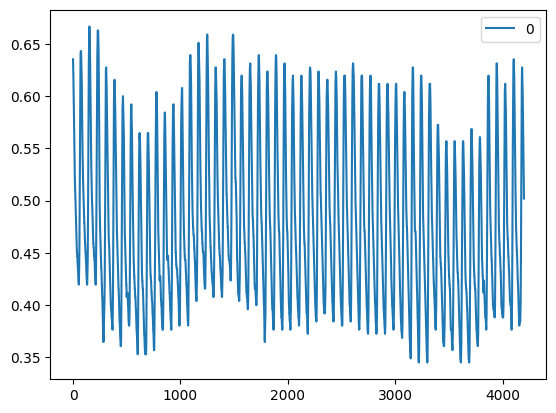

In [155]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [156]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

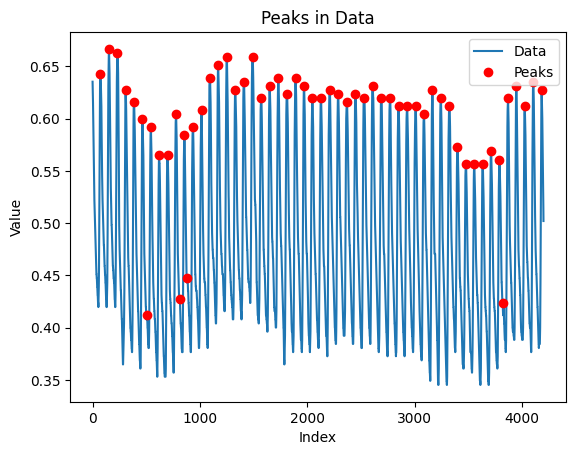

{'indices': array([  73,  152,  232,  308,  386,  464,  504,  542,  620,  698,  777,
        810,  855,  882,  935, 1015, 1092, 1169, 1249, 1328, 1409, 1490,
       1570, 1650, 1730, 1810, 1891, 1969, 2048, 2126, 2207, 2286, 2368,
       2447, 2528, 2607, 2689, 2770, 2849, 2928, 3008, 3085, 3164, 3242,
       3322, 3398, 3476, 3554, 3632, 3711, 3789, 3826, 3868, 3946, 4024,
       4104, 4182]), 'values': array([0.64313725, 0.66666667, 0.6627451 , 0.62745098, 0.61568627,
       0.6       , 0.41176471, 0.59215686, 0.56470588, 0.56470588,
       0.60392157, 0.42745098, 0.58431373, 0.44705882, 0.59215686,
       0.60784314, 0.63921569, 0.65098039, 0.65882353, 0.62745098,
       0.63529412, 0.65882353, 0.61960784, 0.63137255, 0.63921569,
       0.62352941, 0.63921569, 0.63137255, 0.61960784, 0.61960784,
       0.62745098, 0.62352941, 0.61568627, 0.62352941, 0.61960784,
       0.63137255, 0.61960784, 0.61960784, 0.61176471, 0.61176471,
       0.61176471, 0.60392157, 0.62745098, 0.61960784, 0

In [157]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [160]:
def split_values_high_low(filtered_df, threshold=0.55):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[0.6431372549019608, 0.6666666666666666, 0.6627450980392157, 0.6274509803921569, 0.615686274509804, 0.6, None, 0.592156862745098, 0.5647058823529412, 0.5647058823529412, 0.6039215686274509, None, 0.5843137254901961, None, 0.592156862745098, 0.6078431372549019, 0.6392156862745098, 0.6509803921568628, 0.6588235294117647, 0.6274509803921569, 0.6352941176470588, 0.6588235294117647, 0.6196078431372549, 0.6313725490196078, 0.6392156862745098, 0.6235294117647059, 0.6392156862745098, 0.6313725490196078, 0.6196078431372549, 0.6196078431372549, 0.6274509803921569, 0.6235294117647059, 0.615686274509804, 0.6235294117647059, 0.6196078431372549, 0.6313725490196078, 0.6196078431372549, 0.6196078431372549, 0.611764705882353, 0.611764705882353, 0.611764705882353, 0.6039215686274509, 0.6274509803921569, 0.6196078431372549, 0.611764705882353, 0.5725490196078431, 0.5568627450980392, 0.5568627450980392, 0.5568627450980392, 0.5686274509803921, 0.5607843137254902, None, 0.6196078431372549, 0.6313725490196078

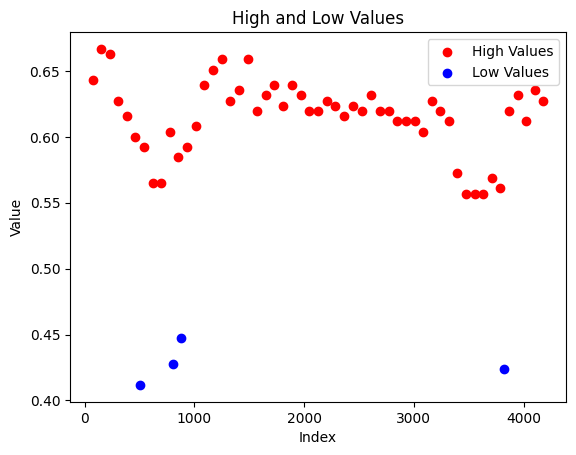

In [161]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [162]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.6150203477617463
Average Low Value: 0.42745098039215684
